

*   uploaded = https://github.com/John-Slack/SEIS_763_Fifa_Values/blob/main/Data/BaseData/fifaValue.csv
*  SupportingDocument = https://github.com/John-Slack/SEIS_763_Fifa_Values/blob/main/Data/HelperData/SupportingData.xlsx

## Supporting Artifact

In [ ]:
from google.colab import files
uploaded = files.upload()
supportingDocument = files.upload()

Saving fifaValue.csv to fifaValue.csv


Saving SupportingData.xlsx to SupportingData.xlsx


In [ ]:
import pandas as pd
import numpy as np
import xlrd
from sklearn import preprocessing

players = pd.read_csv("fifaValue.csv", delimiter=',', header=0)


In [ ]:
players.describe(include='all')
#players.info

,Age,Nationality,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Contract Valid Until,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value
count,18207.000000,18207,17966,18159,18159.000000,18159.000000,18159.000000,18159,18147,17918,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207
unique,NaN,164,651,2,NaN,NaN,NaN,9,27,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
top,NaN,England,FC Barcelona,Right,NaN,NaN,NaN,Medium/ Medium,ST,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,�1.1M
freq,NaN,1662,33,13948,NaN,NaN,NaN,9810,2152,4819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431
mean,25.122206,NaN,NaN,NaN,1.113222,2.947299,2.361308,NaN,NaN,NaN,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,NaN
std,4.669943,NaN,NaN,NaN,0.394031,0.660456,0.756164,NaN,NaN,NaN,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,NaN
min,16.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,21.000000,NaN,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,NaN,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
50%,25.000000,NaN,NaN,NaN,1.000000,3.000000,2.000000,NaN,NaN,NaN,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,NaN
75%,28.000000,NaN,NaN,NaN,1.000000,3.000000,3.000000,NaN,NaN,NaN,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,NaN


## Data Cleanising

In [ ]:
#Find NaN value and Dropping from Dataset
newPlayers = players

rows_with_nan = [index for index, row in newPlayers.iterrows() if row.isnull().any()]

#Dropping row with NaN value
newPlayers = newPlayers.drop(rows_with_nan)

# Reseting Indexes
newPlayers.reset_index()

,index,Age,Nationality,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value
0,0,31,Argentina,FC Barcelona,Left,5.0,4.0,4.0,Medium/ Medium,RF,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,�110.5M
1,1,33,Portugal,Juventus,Right,5.0,4.0,5.0,High/ Low,ST,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,�77M
2,2,26,Brazil,Paris Saint-Germain,Right,5.0,5.0,5.0,High/ Medium,LW,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,�118.5M
3,3,27,Spain,Manchester United,Right,4.0,3.0,1.0,Medium/ Medium,GK,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,�72M
4,4,27,Belgium,Manchester City,Right,4.0,5.0,4.0,High/ High,RCM,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,�102M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,18202,19,England,Crewe Alexandra,Right,1.0,2.0,2.0,Medium/ Medium,CM,2019,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,�60K
17914,18203,19,Sweden,Trelleborgs FF,Right,1.0,2.0,2.0,Medium/ Medium,ST,2020,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,�60K
17915,18204,16,England,Cambridge United,Right,1.0,3.0,2.0,Medium/ Medium,ST,2021,5'8,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,�60K
17916,18205,17,England,Tranmere Rovers,Right,1.0,3.0,2.0,Medium/ Medium,RW,2019,5'10,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,�60K


In [ ]:
# Data Cleansing
import xlrd
from pandas import *
import json
import re 

#SheetName in Supporting Data 
sheetName = ['NationalityContinent','League','Position']

for sheet in sheetName:
  #Converting excel into json 
  nc_df = pandas.read_excel('SupportingData.xlsx', sheet_name=sheet,header=0)

  #Converting into json
  json_dump =nc_df.to_json(orient='records')

  data = np.array(json.loads(json_dump))
  
  if sheet == 'NationalityContinent':
    df = newPlayers['Nationality'].str.replace('[^A-Za-z0-9�?]+ ', '')
  elif sheet == 'League':
    df = newPlayers['Club'].str.replace('[^A-Za-z0-9�?]+ ', '')
  elif sheet == 'Position':
    df = newPlayers['Position'].str.replace('[^A-Za-z0-9�?]+ ', '')

  NRM_LIST = []
  for each in df:
    for iteam in data:
      key_list = list(iteam.keys())
      actual_value = key_list[0]
      NRM_value = key_list[1]
      if each == (re.sub('[^A-Za-z0-9�?]+ ', '', iteam[actual_value])):
        NRM_LIST.append(iteam[NRM_value])

  
  newPlayers["NRM_"+sheet] = Series(NRM_LIST)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
# Contract Valid Until
# Convert Year and replaced Null with NA
from os import error
from datetime import datetime
import numpy as np

new_CVU = []

for each in newPlayers["Contract Valid Until"]:
  try:
    if len(each) == 9 :
      data = '20' + each[7:9]
      new_CVU.append(data)
    elif len(each) == 8:
      data = '20' + each[6:8]
      new_CVU.append(data)
    else:
      data = each
      new_CVU.append(each)
  except Exception :
    new_CVU.append('NaN')
  
newPlayers["NRM_CVU"] = new_CVU

In [ ]:
for each in newPlayers["NRM_CVU"]:
  if each == '2009':
    print('Here....')

In [ ]:
# Removing Special Character Value
# Removing Special Character from Variable “Value”

import decimal
df = newPlayers['Value'].str.replace('[�]','')

# Converting K to Mill if Required
new_Value = []
for each in df:
  if 'K' in each:
    data = str(round(decimal.Decimal(int(each.replace('K',''))/1000000),6))
    new_Value.append(data)
  else:
    data = each.replace("M",'')
    new_Value.append(data)

newPlayers["NRM_Value_Mil"] = new_Value

#Converting object into Float and raise raise exceptions for invalid
newPlayers["NRM_Value_Mil"] = newPlayers["NRM_Value_Mil"].astype(float, errors = 'raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [ ]:
# Converting Height to CM 

df_height = newPlayers['Height'].str.replace("'",'.')

#Replace Null value with "NA"
df_height.fillna("NA", inplace = True)

# 12 incheas to 1 Foot
inch_to_foot = 12

NRM_Height = []
for x in df_height:
  if x != "NA":
    data = inch_to_foot * float(x)
    NRM_Height.append(round(data,2))
  else:
    data = 0
    NRM_Height.append(data)

newPlayers["NRM_Height"] = NRM_Height

# Remove Scale from Weight
df_weight = newPlayers['Weight'].str.replace("lbs",'')

newPlayers["NRM_Weight"] = df_weight.astype(float, errors = 'raise')

newPlayers["NRM_WorkRate"] = newPlayers["Work Rate"].str.replace("/ ",'-')

newPlayers.rename(columns={"'Preferred Foot'":'Preferred_Foot'}, inplace=True)

In [ ]:
# Dropping Redundant features

dropFeatureList = ['Nationality', 'Club','Position','Contract Valid Until','Height','Value','Weight','Work Rate']

newPlayers = newPlayers.drop((dropFeatureList) , axis = 1)

newPlayers.reset_index()

,index,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,NRM_NationalityContinent,NRM_League,NRM_Position,NRM_CVU,NRM_Value_Mil,NRM_Height,NRM_Weight,NRM_WorkRate
0,0,31,Left,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,South America,LaLiga Santander,ATT,2021,110.50000,68.40,159.0,Medium-Medium
1,1,33,Right,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,Europe,Serie A TIM,ATT,2022,77.00000,74.40,183.0,High-Low
2,2,26,Right,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,South America,Ligue 1 Conforama,ATT,2022,118.50000,70.80,150.0,High-Medium
3,3,27,Right,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,Europe,Premier League,GK,2020,72.00000,76.80,168.0,Medium-Medium
4,4,27,Right,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,Europe,Premier League,MID,2023,102.00000,61.32,154.0,High-High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,18202,19,Right,1.0,2.0,2.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,NaN,NaN,NaN,2019,0.00006,70.80,134.0,Medium-Medium
17914,18203,19,Right,1.0,2.0,2.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,NaN,NaN,NaN,2020,0.00006,75.60,170.0,Medium-Medium
17915,18204,16,Right,1.0,3.0,2.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,NaN,NaN,NaN,2021,0.00006,69.60,148.0,Medium-Medium
17916,18205,17,Right,1.0,3.0,2.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,NaN,NaN,NaN,2019,0.00006,61.20,154.0,Medium-Medium


# Standardization and Dummy Variables

In [ ]:
! #pip install category_encoders
newPlayers

,Age,Nationality,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Contract Valid Until,...,GKReflexes,Value,NRM_NationalityContinent,NRM_League,NRM_Position,NRM_CVU,NRM_Value_Mil,NRM_Height,NRM_Weight,NRM_WorkRate
0,31,Argentina,FC Barcelona,Left,5.0,4.0,4.0,Medium/ Medium,RF,2021,...,8.0,�110.5M,South America,LaLiga Santander,ATT,2021,110.50000,68.40,159.0,Medium-Medium
1,33,Portugal,Juventus,Right,5.0,4.0,5.0,High/ Low,ST,2022,...,11.0,�77M,Europe,Serie A TIM,ATT,2022,77.00000,74.40,183.0,High-Low
2,26,Brazil,Paris Saint-Germain,Right,5.0,5.0,5.0,High/ Medium,LW,2022,...,11.0,�118.5M,South America,Ligue 1 Conforama,ATT,2022,118.50000,70.80,150.0,High-Medium
3,27,Spain,Manchester United,Right,4.0,3.0,1.0,Medium/ Medium,GK,2020,...,94.0,�72M,Europe,Premier League,GK,2020,72.00000,76.80,168.0,Medium-Medium
4,27,Belgium,Manchester City,Right,4.0,5.0,4.0,High/ High,RCM,2023,...,13.0,�102M,Europe,Premier League,MID,2023,102.00000,61.32,154.0,High-High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,Crewe Alexandra,Right,1.0,2.0,2.0,Medium/ Medium,CM,2019,...,9.0,�60K,NaN,NaN,NaN,2019,0.00006,70.80,134.0,Medium-Medium
18203,19,Sweden,Trelleborgs FF,Right,1.0,2.0,2.0,Medium/ Medium,ST,2020,...,12.0,�60K,NaN,NaN,NaN,2020,0.00006,75.60,170.0,Medium-Medium
18204,16,England,Cambridge United,Right,1.0,3.0,2.0,Medium/ Medium,ST,2021,...,13.0,�60K,NaN,NaN,NaN,2021,0.00006,69.60,148.0,Medium-Medium
18205,17,England,Tranmere Rovers,Right,1.0,3.0,2.0,Medium/ Medium,RW,2019,...,9.0,�60K,NaN,NaN,NaN,2019,0.00006,61.20,154.0,Medium-Medium


In [ ]:
#=========== Preparing Data ======================#
response_DF = newPlayers["NRM_Value_Mil"]
features_DF = newPlayers.drop(['NRM_Value_Mil'], axis = 1)

In [ ]:
# ===================   Standardization ===================#
#import category_encoders as ce
from sklearn import preprocessing

sdvDF = features_DF

z_dataType = ['int64','float64']
dv_dataType = ['object']

features = sdvDF.columns
dv_list = []
z_list = []

# ============= Preprocessing numerical data ================#
for feature in features:
  if sdvDF.dtypes[feature] in z_dataType:
    z_list.append(feature)

for zz in z_list:
  sdvDF[zz] = preprocessing.scale(sdvDF[zz])

#====================== Dummy Varaibles =====================#
# Converting categorical varaibles to boolean value 
#encoder = ce.OneHotEncoder(use_cat_names=True)
#sdvDF = encoder.fit_transform(sdvDF)
for feature in features:
  if sdvDF.dtypes[feature] in dv_dataType:
    dv_list.append(feature)

for dv in dv_list:

  if dv != 'Preferred Foot':
    dummy = "dummy_{}".format(dv)
    dummy = pd.get_dummies(sdvDF[dv], drop_first=True)
  else:
    dummy = "dummy_Preferred_Foot"
    dummy = pd.get_dummies(sdvDF[dv], drop_first=True)

  sdvDF = pd.concat([sdvDF,dummy], axis=1)

#Dropping Not used varaibles 
x_df = sdvDF.drop((dv_list), axis=1)

# Pre Check Data Quality

In [ ]:
pd.set_option('display.max_columns', None)
print(x_df.shape)

x_df.head()


(17918, 100)


,Age,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,NRM_Height,NRM_Weight,Right,Asia,Europe,North America,Oceania,South America,Allsvenskan,Bundesliga,Bundesliga 2,CSL,Calcio B,Camp. Scotiabank,Domino’s Ligue 2,EFL Championship,EFL League One,EFL League Two,Ekstraklasa,Eliteserien,Eredivisie,Hyundai A-League,K-League 1,LIGA Bancomer MX,LaLiga 1 I 2 I 3,LaLiga Santander,Liga Dimayor,Liga NOS,Liga do Brasil,Ligue 1 Conforama,MLS,Meiji Yasuda J1,Premier League,Pro League,RSL,Rest of World,SAF,SSE Airtricity Lge,Saudi Professional League,Scottish Prem,Serie A TIM,Super Lig,Superliga,DEF,GK,MID,2019,2020,2021,2022,2023,2024,2025,2026,High-Low,High-Medium,Low-High,Low-Low,Low-Medium,Medium-High,Medium-Low,Medium-Medium
0,1.260843,9.826163,1.594849,2.164684,1.866092,2.532743,1.019426,2.131249,2.434905,2.200010,2.489769,2.923926,2.238640,2.255543,1.766165,1.450960,1.860550,3.676739,2.193568,1.714129,0.243610,0.553345,-0.503804,2.434665,-0.454023,-1.193299,2.254251,2.872133,1.686018,3.269932,-0.717719,-0.909315,-0.923511,-0.599640,-0.318041,-0.073212,-0.138909,-0.484698,-0.216281,-0.446617,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.688628,9.826163,1.594849,3.486932,1.866092,2.481492,2.113433,1.518167,2.491441,1.723918,1.837202,1.894334,1.585512,2.135531,1.632357,1.791892,1.589694,3.787553,0.426706,2.295002,2.524665,1.560112,1.089581,2.382719,0.410337,-0.854992,2.305479,2.022202,2.323321,3.182371,-0.969302,-0.770728,-1.064554,-0.543018,-0.318041,-0.073212,-0.138909,-0.317246,0.898713,1.091485,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0.191379,9.826163,3.109798,3.486932,1.593679,2.122739,0.558791,1.722527,2.321832,2.147111,2.217866,2.523529,1.650825,2.195537,1.966877,1.723705,2.199119,3.565926,1.416149,1.423692,-0.347774,1.119651,-1.300497,1.811320,0.006969,-0.516685,1.998111,2.376340,2.068400,3.094811,-1.019618,-1.094097,-0.594411,-0.429776,-0.436543,-0.073212,-0.080057,-0.317246,0.229717,-1.023405,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.405272,7.297617,0.079899,-1.802059,-1.784244,-1.669802,-1.801962,-0.593560,-1.692257,-1.979020,-1.425630,-1.366041,-0.112619,-0.984761,-0.508572,-0.458258,-0.238582,3.122671,-1.481506,-1.422589,0.159127,-1.271421,-0.105458,-1.824859,-1.030264,-0.806663,-1.946448,1.030616,-0.544542,0.818232,-1.623417,-1.232684,-1.534696,4.156548,4.066546,4.298885,4.216150,4.315580,1.344710,0.130171,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.405272,7.297617,3.109798,2.164684,2.356436,1.866486,0.155735,2.267489,2.208759,1.618120,2.054724,2.294731,2.499891,1.955514,0.896413,0.769096,1.047983,3.233485,0.921427,2.062653,-0.178807,1.685958,0.770904,2.278829,1.159450,0.691554,1.895655,2.872133,1.940939,2.569446,1.043359,0.476554,0.251846,-0.090048,-0.199539,-0.680448,-0.374318,-0.205612,-1.531973,-0.767055,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Finding any column with Null value 
x_df.isnull().sum().sort_values(ascending=False)/x_df.shape[0]


Age                 0.0
LaLiga Santander    0.0
Rest of World       0.0
RSL                 0.0
Pro League          0.0
                   ... 
Marking             0.0
Composure           0.0
Penalties           0.0
Vision              0.0
Medium-Medium       0.0
Length: 100, dtype: float64

# Preparing the Data

In [ ]:
#=========== Preparing Data ======================#
y = response_DF
X = x_df

# Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

#Spliting Data
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 1234)

# Building Model 
regr = LinearRegression()

# Fit the Model
regr.fit(X_train, y_train)

#Predicting Test data 
y_pred = regr.predict(X_test)
print(y_pred)

print("RMSE: %.2f" %(mean_squared_error(y_test, y_pred)) ** 0.5)

[0.6630946  4.64754285 2.89383396 ... 1.42381965 2.29973407 0.65381718]
RMSE: 3.30


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

#display adjusted R-squared
adjusted_r2 = (1 - (1-regr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

print("Adjusted R Squared : %.2f"%(adjusted_r2))
print("RMSE: %.2f" %(mean_squared_error(y_test, y_pred)) ** 0.5)
print("Variance Score R-Squared: %.2f" %r2_score(y_test,y_pred))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test, y_pred))

X1 = sm.add_constant(X_train)
est = sm.OLS(y_train, X1)
est2 =est.fit()
#print(est2.summary())

Adjusted R Squared : 0.63
RMSE: 3.30
Variance Score R-Squared: 0.61
MSE θ zero Intercept: 10.86


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(3584, 100)
(3584,)


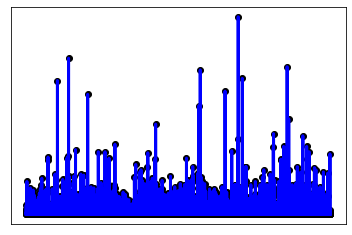

In [ ]:
import matplotlib.pyplot as plt

print(X_test.shape)
print(y_test.shape)

X_test = np.arange(0,len(X_test),1)

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


# Outliers

In [ ]:
# Finding outlier
outliers = est2.get_influence()
leverage = outliers.hat_matrix_diag
dffits = outliers.dffits[0]
resid_stu = outliers.resid_studentized_external
cook = outliers.cooks_distance[0]
contat1 = pd.concat([pd.Series(leverage, name = 'leverage'),pd.Series(dffits, name = 'dffits'),
                     pd.Series(resid_stu,name = 'resid_stu'),pd.Series(cook, name = 'cook')],axis = 1)
X_train.index = range(X_train.shape[0])
df_outliers = pd.concat([X_train,contat1], axis = 1)
print("\n.Outliers are:", np.where(np.abs(df_outliers.resid_stu)>2))


[ 30, 119, 166, 269, 299, 301, 303, 306, 320, 347, 360, 448, 463, 488, 501, 576, 661, 680, 684, 715, 874, 887, 929, 969, 1010, 1038, 1041, 1076, 1084, 1113, 1154, 1183, 1200, 1301, 1321, 1327, 1363, 1373, 1379, 1413, 1447, 1466, 1482, 1494, 1536, 1579, 1580, 1603, 1641, 1646, 1681, 1707, 1721, 1732, 1755, 1756, 1760, 1798, 1863, 1896, 1905, 1906, 1945, 1972, 2008, 2030, 2033, 2065, 2068, 2070, 2104, 2113, 2119, 2142, 2187, 2198, 2210, 2311, 2313, 2340, 2357, 2361, 2453, 2467, 2520, 2565, 2567, 2584, 2625, 2638, 2643, 2644, 2681, 2768, 2831, 2840, 2852, 2883, 2893, 2909, 2949, 2982, 3011, 3012, 3062, 3066, 3097, 3137, 3203, 3250, 3294, 3410, 3471, 3601, 3604, 3627, 3671, 3731, 3749, 3780, 3795, 3895, 3901, 3905, 3910, 3963, 3968, 3993, 3994, 3995, 3996, 4039, 4061, 4099, 4100, 4110, 4127, 4154, 4201, 4211, 4219, 4277, 4278, 4283, 4300, 4336, 4346, 4356, 4394, 4397, 4409, 4421, 4451, 4462, 4540, 4543, 4575, 4622, 4738, 4781, 4824, 4831, 4859, 4914, 4929, 4931, 4946, 4967, 4990, 5040, 5080, 5140, 5141, 5149, 5173, 5193, 5222, 5313, 5354, 5399, 5471, 5495, 5532, 5572, 5623, 5624, 5698, 5701, 5836, 5888, 5971, 6026, 6034, 6039, 6044, 6155, 6193, 6315, 6317, 6368, 6399, 6446, 6487, 6499, 6530, 6542, 6557, 6585, 6592, 6602, 6647, 6722, 6757, 6793, 6855, 6935, 7045, 7055, 7068, 7077, 7098, 7124, 7146, 7172, 7180, 7211, 7218, 7275, 7302, 7305, 7339, 7375, 7482, 7520, 7541, 7564, 7609, 7614, 7619, 7664, 7670, 7762, 7798, 7856, 7873, 7877, 7882, 7902, 7958, 7985, 8000, 8044, 8118, 8138, 8151, 8180, 8199, 8231, 8245, 8255, 8269, 8270, 8313, 8349, 8383, 8411, 8418, 8423, 8441, 8450, 8465, 8488, 8492, 8513, 8553, 8597, 8659, 8702, 8718, 8725, 8775, 8777, 8799, 8825, 8863, 8865, 8882, 8919, 8924, 8956, 8967, 8975, 8988, 9026, 9030, 9039, 9116, 9155, 9242, 9272, 9312, 9331, 9338, 9444, 9489, 9567, 9652, 9682, 9710, 9718, 9725, 9829, 9927, 9935, 9947, 9971, 10005, 10024, 10051, 10101, 10113, 10168, 10222, 10242, 10264, 10274, 10365, 10378, 10393, 10411, 10415, 10439, 10487, 10529, 10541, 10628, 10641, 10678, 10705, 10782, 10814, 10844, 10860, 10861, 10964, 10987, 10994, 11028, 11032, 11073, 11084, 11108, 11115, 11122, 11124, 11129, 11155, 11163, 11243, 11250, 11312, 11335, 11350, 11352, 11370, 11449, 11490, 11529, 11530, 11565, 11579, 11580, 11612, 11623, 11630, 11660, 11664, 11701, 11795, 11803, 11812, 11839, 11846, 11877, 11980, 12013, 12014, 12054, 12100, 12101, 12207, 12311, 12387, 12457, 12461, 12531, 12615, 12619, 12665, 12676, 12678, 12740, 12797, 12831, 12860, 12863, 12887, 12924, 12968, 13100, 13181, 13226, 13267, 13277, 13314, 13330, 13357, 13508, 13626, 13691, 13746, 13750, 13759, 13836, 13847, 13849, 13895, 13921, 14009, 14096, 14157, 14207, 14237, 14238, 14273, 14318, 14328]

.Outliers are: (array([   30,   119,   166,   269,   299,   301,   303,   306,   320,
         347,   360,   448,   463,   488,   501,   576,   661,   680,
         684,   715,   874,   887,   929,   969,  1010,  1038,  1041,
        1076,  1084,  1113,  1154,  1183,  1200,  1301,  1321,  1327,
        1363,  1373,  1379,  1413,  1447,  1466,  1482,  1494,  1536,
        1579,  1580,  1603,  1641,  1646,  1681,  1707,  1721,  1732,
        1755,  1756,  1760,  1798,  1863,  1896,  1905,  1906,  1945,
        1972,  2008,  2030,  2033,  2065,  2068,  2070,  2104,  2113,
        2119,  2142,  2187,  2198,  2210,  2311,  2313,  2340,  2357,
        2361,  2453,  2467,  2520,  2565,  2567,  2584,  2625,  2638,
        2643,  2644,  2681,  2768,  2831,  2840,  2852,  2883,  2893,
        2909,  2949,  2982,  3011,  3012,  3062,  3066,  3097,  3137,
        3203,  3250,  3294,  3410,  3471,  3601,  3604,  3627,  3671,
        3731,  3749,  3780,  3795,  3895,  3901,  3905,  3910,  3963,
        3968,  3993,  3994,  3995,  3996,  4039,  4061,  4099,  4100,
        4110,  4127,  4154,  4201,  4211,  4219,  4277,  4278,  4283,
        4300,  4336,  4346,  4356,  4394,  4397,  4409,  4421,  4451,
        4462,  4540,  4543,  4575,  4622,  4738,  4781,  4824,  4831,
        4859,  4914,  4929,  4931,  4946,  4967,  4990,  5040,  5080,
        5140,  5141,  5149,  5173,  5193,  5222,  5313,  5354,  5399,
        5471,  5495,  5532,  5572,  5623,  5624,  5698,  5701,  5836,
        5888,  5971,  6026,  6034,  6039,  6044,  6155,  6193,  6315,
        6317,  6368,  6399,  6446,  6487,  6499,  6530,  6542,  6557,
        6585,  6592,  6602,  6647,  6722,  6757,  6793,  6855,  6935,
        7045,  7055,  7068,  7077,  7098,  7124,  7146,  7172,  7180,
        7211,  7218,  7275,  7302,  7305,  7339,  7375,  7482,  7520,
        7541,  7564,  7609,  7614,  7619,  7664,  7670,  7762,  7798,
        7856,  7873,  7877,  7882,  7902,  7958,  7985,  8000,  8044,
        8118,  8138,  8151,  8180,  8199,  8231,  8245,  8255,  8269,
        8270,  8313,  8349,  8383,  8411,  8418,  8423,  8441,  8450,
        8465,  8488,  8492,  8513,  8553,  8597,  8659,  8702,  8718,
        8725,  8775,  8777,  8799,  8825,  8863,  8865,  8882,  8919,
        8924,  8956,  8967,  8975,  8988,  9026,  9030,  9039,  9116,
        9155,  9242,  9272,  9312,  9331,  9338,  9444,  9489,  9567,
        9652,  9682,  9710,  9718,  9725,  9829,  9927,  9935,  9947,
        9971, 10005, 10024, 10051, 10101, 10113, 10168, 10222, 10242,
       10264, 10274, 10365, 10378, 10393, 10411, 10415, 10439, 10487,
       10529, 10541, 10628, 10641, 10678, 10705, 10782, 10814, 10844,
       10860, 10861, 10964, 10987, 10994, 11028, 11032, 11073, 11084,
       11108, 11115, 11122, 11124, 11129, 11155, 11163, 11243, 11250,
       11312, 11335, 11350, 11352, 11370, 11449, 11490, 11529, 11530,
       11565, 11579, 11580, 11612, 11623, 11630, 11660, 11664, 11701,
       11795, 11803, 11812, 11839, 11846, 11877, 11980, 12013, 12014,
       12054, 12100, 12101, 12207, 12311, 12387, 12457, 12461, 12531,
       12615, 12619, 12665, 12676, 12678, 12740, 12797, 12831, 12860,
       12863, 12887, 12924, 12968, 13100, 13181, 13226, 13267, 13277,
       13314, 13330, 13357, 13508, 13626, 13691, 13746, 13750, 13759,
       13836, 13847, 13849, 13895, 13921, 14009, 14096, 14157, 14207,
       14237, 14238, 14273, 14318, 14328]),)

In [ ]:
#Removeing Outliers
#df = newPlayers.drop(df_outliers)
no_out_DF = newPlayers.drop([ 30, 119, 166, 269, 299, 301, 303, 306, 320, 347, 360, 448, 463, 488, 501, 576, 661, 680, 684, 715, 887, 929, 969, 1010, 1038, 1041, 1076, 1084, 1113, 1154, 1183, 1200, 1301, 1321, 1327, 1363, 1373, 1379, 1413, 1447, 1466, 1482, 1494, 1536, 1579, 1580, 1603, 1641, 1646, 1681, 1707, 1721, 1732, 1755, 1756, 1760, 1798, 1863, 1896, 1905, 1906, 1945, 1972, 2008, 2030, 2033, 2068, 2070, 2104, 2113, 2119, 2142, 2187, 2198, 2210, 2311, 2313, 2340, 2357, 2361, 2453, 2467, 2520, 2565, 2567, 2584, 2625, 2638, 2643, 2644, 2681, 2768, 2831, 2840, 2852, 2883, 2893, 2909, 2949, 2982, 3011, 3012, 3062, 3066, 3097, 3137, 3203, 3250, 3294, 3410, 3471, 3601, 3604, 3627, 3671, 3731, 3749, 3780, 3795, 3895, 3901, 3905, 3910, 3963, 3968, 3993, 3994, 3995, 3996, 4039, 4061, 4099, 4100, 4110, 4127, 4154, 4201, 4211, 4219, 4277, 4278, 4283, 4300, 4336, 4346, 4356, 4394, 4397, 4409, 4421, 4451, 4462, 4540, 4543, 4575, 4622, 4738, 4781, 4824, 4831, 4859, 4914, 4929, 4931, 4946, 4967, 4990, 5040, 5080, 5140, 5141, 5149, 5173, 5193, 5222, 5313, 5354, 5399, 5471, 5495, 5532, 5572, 5623, 5624, 5698, 5701, 5836, 5888, 5971, 6026, 6034, 6039, 6044, 6155, 6193, 6315, 6317, 6368, 6399, 6446, 6487, 6499, 6530, 6557, 6585, 6592, 6602, 6647, 6722, 6757, 6793, 6855, 6935, 7045, 7055, 7068, 7077, 7098, 7124, 7146, 7172, 7180, 7211, 7218, 7275, 7302, 7305, 7339, 7375, 7482, 7520, 7541, 7564, 7609, 7614, 7619, 7664, 7670, 7762, 7798, 7856, 7873, 7877, 7882, 7902, 7958, 7985, 8000, 8044, 8118, 8138, 8151, 8180, 8199, 8231, 8245, 8255, 8269, 8270, 8313, 8349, 8383, 8411, 8418, 8423, 8450, 8465, 8488, 8492, 8513, 8553, 8597, 8659, 8702, 8718, 8725, 8775, 8777, 8799, 8825, 8863, 8865, 8882, 8919, 8924, 8956, 8967, 8975, 8988, 9026, 9030, 9039, 9116, 9155, 9242, 9272, 9312, 9331, 9338, 9444, 9489, 9567, 9652, 9682, 9710, 9718, 9725, 9829, 9927, 9935, 9947, 9971, 10005, 10024, 10051, 10101, 10113, 10168, 10222, 10242, 10264, 10274, 10365, 10378, 10393, 10411, 10415, 10439, 10487, 10529, 10541, 10641, 10678, 10705, 10782, 10814, 10844, 10860, 10861, 10964, 10987, 10994, 11028, 11032, 11073, 11084, 11108, 11115, 11122, 11124, 11129, 11155, 11163, 11243, 11250, 11312, 11335, 11350, 11352, 11370, 11449, 11490, 11529, 11530, 11565, 11579, 11580, 11612, 11623, 11630, 11660, 11664, 11701, 11795, 11803, 11812, 11839, 11846, 11877, 11980, 12013, 12014, 12054, 12100, 12101, 12207, 12311, 12387, 12457, 12461, 12531, 12615, 12619, 12665, 12676, 12678, 12740, 12797, 12831, 12860, 12863, 12887, 12924, 12968, 13100, 13181, 13226, 13314, 13330, 13357, 13626, 13691, 13746, 13750, 13759, 13836, 13847, 13849, 13895, 13921, 14009, 14096, 14157, 14207, 14237, 14238, 14273, 14318, 14328],)
#no_out_DF = no_out_DF.to_numpy()

#no_out_DF = no_out_DF.reshape(1,-1)

# Download Dataset to local

In [ ]:
from google.colab import files

newPlayers.to_csv("NRM_Data.csv")
files.download("NRM_Data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Re-Standardization and Rebuilding the model

In [ ]:
# Standardization
#import category_encoders as ce
from sklearn import preprocessing

newDF = no_out_DF

#=========== Preparing Data ======================#
new_Response_DF = newDF["NRM_Value_Mil"]
new_Features_DF = newDF.drop(['NRM_Value_Mil'], axis = 1)

z_dataType = ['int64','float64']
dv_dataType = ['object']

features = new_Features_DF.columns
dv_list = []
z_list = []

# ============= Preprocessing numerical data ================#
for feature in features:
  if new_Features_DF.dtypes[feature] in z_dataType:
    z_list.append(feature)

for zz in z_list:
  new_Features_DF[zz] = preprocessing.scale(new_Features_DF[zz])

#====================== Dummy Varaibles =====================#
# Converting categorical varaibles to boolean value 
#encoder = ce.OneHotEncoder(use_cat_names=True)
#newDF = encoder.fit_transform(newDF)
for feature in features:
  if new_Features_DF.dtypes[feature] in dv_dataType:
    dv_list.append(feature)

for dv in dv_list:

  if dv != 'Preferred Foot':
    dummy = "dummy_{}".format(dv)
    dummy = pd.get_dummies(new_Features_DF[dv], drop_first=True)
  else:
    dummy = "dummy_Preferred_Foot"
    dummy = pd.get_dummies(new_Features_DF[dv], drop_first=True)

  new_Features_DF = pd.concat([new_Features_DF,dummy], axis=1)

#Dropping Not used varaibles 
new_X_DF = new_Features_DF.drop((dv_list), axis=1)

# Precheck

In [ ]:
# Finding any column with Null value 
new_X_DF.isnull().sum().sort_values(ascending=False)/new_X_DF.shape[0]

Age                 0.0
LaLiga Santander    0.0
Rest of World       0.0
RSL                 0.0
Pro League          0.0
                   ... 
Marking             0.0
Composure           0.0
Penalties           0.0
Vision              0.0
Medium-Medium       0.0
Length: 100, dtype: float64

# Preparing Final Data 

In [ ]:
#=========== Preparing Data ======================#
y_1 = new_Response_DF
X_1 = new_X_DF

print(X_1.shape)
print(y_1.shape)

(17489, 100)
(17489,)


In [ ]:
X_1.head()

,Age,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,NRM_Height,NRM_Weight,Right,Asia,Europe,North America,Oceania,South America,Allsvenskan,Bundesliga,Bundesliga 2,CSL,Calcio B,Camp. Scotiabank,Domino’s Ligue 2,EFL Championship,EFL League One,EFL League Two,Ekstraklasa,Eliteserien,Eredivisie,Hyundai A-League,K-League 1,LIGA Bancomer MX,LaLiga 1 I 2 I 3,LaLiga Santander,Liga Dimayor,Liga NOS,Liga do Brasil,Ligue 1 Conforama,MLS,Meiji Yasuda J1,Premier League,Pro League,RSL,Rest of World,SAF,SSE Airtricity Lge,Saudi Professional League,Scottish Prem,Serie A TIM,Super Lig,Superliga,DEF,GK,MID,2019,2020,2021,2022,2023,2024,2025,2026,High-Low,High-Medium,Low-High,Low-Low,Low-Medium,Medium-High,Medium-Low,Medium-Medium
0,1.267767,9.836416,1.598078,2.169325,1.869485,2.534134,1.024413,2.132033,2.438364,2.201021,2.494536,2.930805,2.241218,2.256658,1.765949,1.452080,1.862464,3.673395,2.193165,1.717703,0.247961,0.556609,-0.497195,2.438568,-0.447193,-1.187653,2.255174,2.877546,1.689318,3.267957,-0.713874,-0.904851,-0.919811,-0.600204,-0.318995,-0.074551,-0.140007,-0.485263,-0.214502,-0.443968,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.695406,9.836416,1.598078,3.491991,1.869485,2.482908,2.117737,1.520148,2.494889,1.725388,1.841854,1.900271,1.588658,2.136856,1.632251,1.792781,1.591539,3.783859,0.425504,2.298235,2.529132,1.561466,1.094575,2.386624,0.415807,-0.849433,2.306360,2.026985,2.326673,3.180630,-0.965588,-0.766262,-1.060897,-0.543672,-0.318995,-0.074551,-0.140007,-0.318027,0.900003,1.092744,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0.198671,9.836416,3.113985,3.491991,1.597207,2.124329,0.564066,1.724109,2.325314,2.148173,2.222585,2.530042,1.653914,2.196757,1.966495,1.724641,2.201121,3.562931,1.415394,1.427437,-0.343454,1.121841,-1.293080,1.815244,0.013073,-0.511213,1.999240,2.381385,2.071731,3.093303,-1.015931,-1.089635,-0.590609,-0.430606,-0.437308,-0.074551,-0.081220,-0.318027,0.231300,-1.020235,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0.412491,7.305647,0.082171,-1.798670,-1.779048,-1.666370,-1.795213,-0.587456,-1.687961,-1.973979,-1.421560,-1.363085,-0.107998,-0.977978,-0.506905,-0.455844,-0.237205,3.121074,-1.483570,-1.417170,0.163473,-1.264692,-0.099252,-1.820810,-1.022527,-0.801116,-1.942135,1.034665,-0.541426,0.822803,-1.620043,-1.228223,-1.531184,4.148534,4.058609,4.292123,4.210205,4.308828,1.345804,0.132299,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.412491,7.305647,3.113985,2.169325,2.359587,1.868201,0.161262,2.268007,2.212264,1.619692,2.059415,2.301034,2.502242,1.957154,0.896916,0.770679,1.049689,3.231538,0.920449,2.066023,-0.174478,1.687073,0.776221,2.282737,1.163740,0.696715,1.896867,2.877546,1.944260,2.569342,1.048121,0.481032,0.255909,-0.091411,-0.200681,-0.681033,-0.375154,-0.206537,-1.529617,-0.764116,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# LinearRegression 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

regr1 = LinearRegression()

#Building Model
X_train_lr , X_test_lr, y_train_lr, y_test_lr = train_test_split(X_1, y_1, test_size= 0.20, random_state = 1234)

# Fit the Model
regr1.fit(X_train_lr, y_train_lr)

#Predicting Test data 
lr_pred = regr1.predict(X_test_lr)
print(lr_pred)

print("RMSE: %.2f" %(mean_squared_error(y_test_lr, lr_pred)) ** 0.5)
print("Variance Score R-Squared: %.2f" %r2_score(y_test_lr,lr_pred))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test_lr, lr_pred))

[ 0.05125009  3.58571771 -0.23006675 ...  7.79851157  1.80895578
  2.31674852]
RMSE: 3.36
Variance Score R-Squared: 0.62
MSE θ zero Intercept: 11.27


# Decission Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#Building Model
X_train_dt , X_test_dt, y_train_dt, y_test_dt = train_test_split(X_1, y_1, test_size= 0.20, random_state = 1234)

dt = DecisionTreeRegressor()
dt.fit(X_train_dt, y_train_dt)
dt_pred = dt.predict(X_test_dt)

print(dt_pred)

print("RMSE: %.2f" %(mean_squared_error(y_test_dt, dt_pred)) ** 0.5)
print("Variance Score R-Squared: %.2f" %r2_score(y_test_dt,dt_pred))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test_dt, dt_pred))


[2.9e-04 2.0e+00 1.2e+00 ... 8.5e+00 1.5e-04 2.9e-04]
RMSE: 2.52
Variance Score R-Squared: 0.78
MSE θ zero Intercept: 6.33


# Lasso Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso,LassoLarsCV

X_train_lasso , X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_1, y_1, test_size= 0.20, random_state = 1234)

# Training LassoCV
eps = 1e-3 # the smaller it is the longer is the path

#LassoCV default "number of alphas=100",you could set by yourself
model = LassoCV(eps=eps,cv=10) 
model.fit(X_train_lasso,y_train_lasso)
alphas = model.alphas_
alpha = model.alpha_
mse_path = model.mse_path_

lasso_pred = model.predict(X_test_lasso)

print('The best model is selected by cross-validation.:')
print('Selected alpha:',model.alpha_)
print('Intercept:',model.intercept_)
print('Coefficients:',model.coef_)

print("RMSE: %.2f" %(mean_squared_error(y_test_lasso, lasso_pred)) ** 0.5)
print("Variance Score R-Squared: %.2f" %r2_score(y_test_lasso,lasso_pred))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test_lasso, lasso_pred))

The best model is selected by cross-validation.:
Selected alpha: 0.003909438492815084
Intercept: 2.925794401928814
Coefficients: [-1.32047600e+00  2.72555414e+00  1.01174052e-01  5.60593625e-01
 -9.67667443e-02  5.56716785e-01  3.51229469e-01  3.40003054e-01
  4.12592583e-02 -1.63840292e-01 -4.74005517e-02  2.01587026e-01
 -0.00000000e+00  5.18067594e-01  2.26062991e-01  3.49134036e-02
 -1.38020115e-01  1.29859075e+00 -3.92614002e-02 -1.03960846e-01
 -3.69361920e-02  4.56108901e-01  9.55783020e-02 -1.90511587e-01
 -8.24329152e-02 -1.80276887e-01 -3.14900929e-01  0.00000000e+00
 -1.86352795e-01  3.92077964e-01  2.19631597e-01  1.23224957e-01
 -9.14233974e-02  3.48920661e-01  4.01853385e-01  3.86604976e-01
  2.49180677e-01  2.34307361e-01  8.22971651e-02  6.39647418e-02
 -6.79604826e-02 -5.97308604e-02 -7.15161117e-02 -3.21457062e-01
  0.00000000e+00 -3.15179385e-03 -1.85768849e-01  7.46723263e-02
 -6.02028874e-01 -1.07897405e-01 -7.29030733e-01 -4.18983878e-01
 -4.40170247e-01 -4.685802

In [ ]:
# Finding Top Predictors 
M = {}
M_df = pd.DataFrame(M)
i = 0
for a in alphas:
    choose = Lasso(alpha=a)
    choose.fit(X_1,y_1)
    M[i] = [a,choose.coef_,choose.intercept_]
    i +=1
print('\n',M)


 {0: [3.9094384928150827, array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,
        0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0.,
        0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,
        0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.]), 2.171698830693579], 1: [3.6459554228334388, array([ 0.        ,  0.12635816,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0. 

## SVM

In [ ]:
from sklearn import svm

X_train_sv , X_test_sv, y_train_sv, y_test_sv = train_test_split(X_1, y_1, test_size= 0.20, random_state = 1234)

classifier = svm.SVC(kernel = 'rbf', gamma = 'auto', C = 2)

classifier.fit(X_train_sv,y_train_sv)

ValueError: ignored

#Metrics to Evaluate Model 

In [ ]:
#Metrics to Evaluate Model 
print("Liner Regression:")
print(r2_score(y_test_lr, lr_pred), mean_absolute_error(y_test_lr, lr_pred), np.sqrt(mean_squared_error(y_test_lr, lr_pred)))
print("Decession Trees:")
print(r2_score(y_test_dt, dt_pred), mean_absolute_error(y_test_dt, dt_pred), np.sqrt(mean_squared_error(y_test_dt, dt_pred)))
print("Lasso Trees:")
print(r2_score(y_test_lasso, lasso_pred), mean_absolute_error(y_test_lasso, lasso_pred), np.sqrt(mean_squared_error(y_test_lasso, lasso_pred)))


Liner Regression:
0.6166231633115999 1.8850008557111464 3.356706701759371
Decession Trees:
0.7845390896383133 0.9181128016009148 2.516429142630364
Lasso Trees:
0.6131344976015072 1.8890097603071108 3.3719448515919677


# K Mean / Clustering

In [ ]:
# UDF 
def get_offense(a,b):
  if ((a ==1) | (b ==1)):
    return 1
  else:
    return 0

def get_defense(a,b):
  if ((a ==1) | (b ==1)):
    return 1
  else:
    return 0

In [ ]:
from sklearn.cluster import KMeans

# Grouping Similar Players based on NRM_Position
# Clubbing based on NRM_NationalityContinent
# Clubbing based on NRM_League
# Clubing based on NRM_WorkRate

X_clstr = X_1
features = X_clstr.columns

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_clstr[features])

X_clstr['players_offense'] = X_clstr.apply(lambda x: get_offense(x['MID'], x['MID']), axis=1)
X_clstr['players_defense'] = X_clstr.apply(lambda x: get_defense(x['DEF'], x['GK']), axis=1)



# Classification

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

#y = lambda symbol: 'X' if symbol==True else 'O' if symbol==False else ' '
def get_class(a):
  if (a >= 75):
    return 'High'
  elif ((a <= 75) and (a >= 25)):
    return 'Medium'
  else:
    return 'low'

df_class = newDF

df_class['Class'] = df_class.apply(lambda x: get_class(x['NRM_Value_Mil']), axis = 1)

y_response_class = label_binarize(df_class['Class'], classes=[0,1,2])
#y_response_class = label_binarize(y_1, classes=[0,1,2])

n_classes = 3

# shuffle and split training and test sets
X_train_clfr, X_test_clfr, y_train_clfr, y_test_clfr = train_test_split(X_1, y_response_class, test_size=0.20, random_state=0)

# Classifier 
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train_clfr, y_train_clfr).decision_function(X_test_clfr)

clfr_prob= clf.predict_proba(X_test_clfr)
clfr_yhat = clf.predict(X_test_clfr)


In [ ]:
print("Classification Report : \n")
print(classification_report(y_train_clfr,clfr_yhat))

Classification Report : 



ValueError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


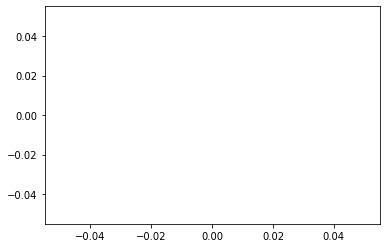

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for cur_class in range(n_classes):
    fpr[cur_class], tpr[cur_class], _ = roc_curve(y_test_clfr[:, cur_class], y_score[:, cur_class ])  #, pos_label= 1)
    roc_auc[cur_class] = auc(fpr[cur_class], tpr[cur_class])
    plt.plot(fpr[cur_class],tpr[cur_class], marker='.', label='Class_0', color='b')

In [ ]:
pd.option_context('display.max_rows', None,)
#df_class.groupby('Class').count()
y_response_class

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
# ================== Liner Regression ========================== #
regr_km = LinearRegression()

#Building Model
X_train_km , X_test_km, y_train_km, y_test_km = train_test_split(X_1, y_1, test_size= 0.20, random_state = 1234)

# Fit the Model
regr_km.fit(X_train_km, y_train_km)

#Predicting Test data 
lr_km_pred = regr_km.predict(X_test_km)
print(lr_km_pred)

# ================== Decession ================================== #
#Test Accuracy 
km_score = regr_km.score(X_test_km, y_test_km)
print("Model Accuracy : {}".format(km_score))

dt_km = DecisionTreeRegressor()
dt_km.fit(X_train_km, y_train_km)
dt_km_pred = dt_km.predict(X_test_km)

#Predicting Test data 
print(dt_km_pred)

#Test Accuracy 
dt_km_pred_score = dt_km.score(X_test_km, y_test_km)
print("Model Accuracy : {}".format(dt_km_pred_score))

# ===================== Lasso ================================== #
eps = 1e-3 # the smaller it is the longer is the path

#LassoCV default "number of alphas=100",you could set by yourself
km_lasso = LassoCV(eps=eps,cv=10) 
km_lasso.fit(X_train_km,y_train_km)
alphas = km_lasso.alphas_
alpha = km_lasso.alpha_
mse_path = km_lasso.mse_path_

km_lasso_pred = km_lasso.predict(X_test_km)

km_lasso_score = km_lasso.score(X_test_km, y_test_km)
print("Lasoo Model Accuracy : {}".format(km_lasso_score))

[ 0.63891602  0.8918457   2.65917969 ...  0.81933594  0.78027344
 -0.5612793 ]
Model Accuracy : 0.5973427909383737
[2.30e-04 4.10e+00 3.30e+00 ... 6.00e-04 8.25e-04 3.75e-04]
Model Accuracy : 0.7962722650306103
Lasoo Model Accuracy : 0.6043106816517083


In [ ]:
#Metrics to Evaluate Model 
print("Liner Regression:")
print(r2_score(y_test_lr, lr_pred), mean_absolute_error(y_test_lr, lr_pred), np.sqrt(mean_squared_error(y_test_lr, lr_pred)))
print("Decession Trees:")
print(r2_score(y_test_dt, dt_pred), mean_absolute_error(y_test_dt, dt_pred), np.sqrt(mean_squared_error(y_test_dt, dt_pred)))
print("Lasso Trees:")
print(r2_score(y_test_lasso, lasso_pred), mean_absolute_error(y_test_lasso, lasso_pred), np.sqrt(mean_squared_error(y_test_lasso, lasso_pred)))

print("\n")
print("After Clusterning :")
print("Liner Regression:")
print(r2_score(y_test_km, lr_km_pred), mean_absolute_error(y_test_km, lr_km_pred), np.sqrt(mean_squared_error(y_test_km, lr_km_pred)))
print("Decession Trees:")
print(r2_score(y_test_km, dt_km_pred), mean_absolute_error(y_test_km, dt_km_pred), np.sqrt(mean_squared_error(y_test_km, dt_km_pred)))
print("Lasso Trees:")
print(r2_score(y_test_km, km_lasso_pred), mean_absolute_error(y_test_km, km_lasso_pred), np.sqrt(mean_squared_error(y_test_km, km_lasso_pred)))

Liner Regression:
0.5973246005643585 1.857271465170724 3.353565217092818
Decession Trees:
0.7458235952016723 0.9558844838169642 2.664384041188509
Lasso Trees:
0.6043106816517083 1.843381380383873 3.3243471608473816


After Clusterning :
Liner Regression:
0.5973427909383737 1.857024794115339 3.353489469611579
Decession Trees:
0.7962722650306103 0.9249980147879465 2.38536194166158
Lasso Trees:
0.6043106816517083 1.843381380383873 3.3243471608473816


#SVC